# Уроки по Python3
## Введение в машинное обучение. Работа с библиотекой Scikit-Learn

### Датасет Boston

In [1]:
import numpy as np
import random as r
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib
r.seed(0)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

Using matplotlib backend: nbAgg


Загружаем датасет

In [2]:
boston_data = load_boston()

Выводим ключевые функции

In [3]:
print(boston_data.keys())

dict_keys(['data', 'feature_names', 'target', 'DESCR'])


Выводим описание датасета, количество примеров: 506, количество атрибутов: 13 (не включая цель: MEDV - Median Value)

In [4]:
print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Создаем таблицу с данными, показатели располагаются по колонкам

In [5]:
df = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Выводим статистику для каждого из показателей: mean, std, min, 25%, 50%, 75%, max

In [6]:
df_descr = df.describe()
df_descr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Выводим данные в графическом виде, например: LSTAT

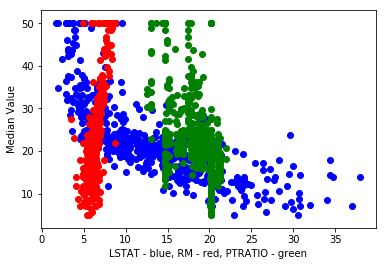

In [8]:
fig = plt.figure()
plt.scatter(df['LSTAT'], boston_data['target'], color='blue')
plt.scatter(df['RM'], boston_data['target'], color='red')
plt.scatter(df['PTRATIO'], boston_data['target'], color='green')
plt.xlabel('LSTAT - blue, RM - red, PTRATIO - green')
plt.ylabel('Median Value')
plt.show()

3 важнейших параметра для оценки дома: % населения за чертой бедности (LSTAT), количество комнат (RM) и отношение учеников-учитилей (PTRATIO). Так как данные параметры имеют минимальную ошибку при предсказании цены дома.

Вводим классификатор (линейная регрессия: copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
clf = LinearRegression()

x_feature = 'LSTAT'
y_feature = 'RM'

Создаем массив данных для выбранных параметров

In [10]:
X = df[[x_feature, y_feature]].values
X.shape

(506, 2)

Добавляем свойство полинома - степень (degree=1, include_bias=True, interaction_only=False)

In [11]:
feat = PolynomialFeatures(degree=1)

Нормализуем данные массива

In [12]:
X_poly = feat.fit_transform(X)
print(X_poly.shape)
y = boston_data['target']

(506, 3)


Выделяем из общих данных обучающую и тренировочную выборку (10% от всех данных)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)

Выбираем метод нормализации данных (copy=True, with_mean=True, with_std=True) и преобразуем данные от -1 до 1

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Применяем выбранный ранее классификатор на наших данных

In [17]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Выводим данные о результате работы модели на обучающей выборке, метрика качества работы модели от 0 до 1

In [18]:
print('Train:', clf.score(X_train, y_train))

Train: 0.6342983535033396


Выводим данные о результате работы модели на тренировочной выборке, метрика качества работы модели от 0 до 1

In [19]:
print('Test:', clf.score(X_test, y_test))

Test: 0.6770820650274576


Выводим данные о среднеквадратических отклонениях

In [21]:
print('MSE on Train:', mean_squared_error(y_train, clf.predict(X_train)))
print('MSE on Test:', mean_squared_error(y_test, clf.predict(X_test)))

MSE on Train: 31.67869717111901
MSE on Test: 20.161128621799353
